In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

csvpath_fbi = "FullCrimeStatsFinal.csv"
csvpath_census = ("CensusDataFrameCleanSplit.csv")

crime_df = pd.read_csv(csvpath_fbi)
census_df = pd.read_csv(csvpath_census)

#crime_df.head()
census_df.head()

,Unnamed: 0,State,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
0,0,ARKANSAS,CARROLL,27690,44.4,38145,20888,4789,17.295052,739,91,4,3.430841,2.668834
1,1,ARKANSAS,CHICOT,11189,43.7,29628,18853,3252,29.064260,446,131,17,13.227277,3.986058
2,2,ARKANSAS,CLARK,22684,33.6,35595,19500,4762,20.992770,858,94,12,4.672897,3.782402
3,3,ARKANSAS,CLAY,15202,44.0,32404,19192,3340,21.970793,474,76,0,4.999342,3.118011
4,4,ARKANSAS,CLEBURNE,25587,47.9,41717,25078,3901,15.246023,903,98,9,4.181811,3.529136


In [2]:
fbi_census_df = pd.merge(crime_df,census_df,on=["County","State"],how="left")
fbi_census_df.head()

,Unnamed: 0_x,Unnamed: 0.1,State,County,Female Civilians,Female Officers,Male Civilians,Male Officers,Crime Cleared Count aggravated-assault,Crime Cleared Count arson,...,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
0,0,0,ALABAMA,BLOUNT,14,3,11,49,65,3,...,40.8,46212,21033,9441,16.361084,1367,268,30,5.164287,2.368987
1,1,1,ALABAMA,BUTLER,9,0,4,51,37,1,...,40.6,34315,19011,5126,25.276134,849,88,40,6.311637,4.186391
2,2,2,ALABAMA,CHILTON,5,6,1,65,65,2,...,38.7,42594,22045,8779,20.035603,1520,226,0,5.157815,3.468973
3,3,3,ALABAMA,COVINGTON,13,4,10,72,98,0,...,42.9,37313,21738,7031,18.635532,1723,110,68,4.717856,4.566779
4,4,4,ALABAMA,CRENSHAW,5,0,2,23,7,0,...,41.6,37557,20455,2484,17.875648,452,34,2,2.590674,3.252735


In [61]:
group = fbi_census_df.groupby(by="State").aggregate({"Total Crime":"sum","Law-Enforcement per 1000":"sum",
                                                     "Population":"sum","Total Non-Violent Crime":"sum",
                                                    "Total Violent Crime":"sum"})
group

,Total Crime,Law-Enforcement per 1000,Population,Total Non-Violent Crime,Total Violent Crime
State,,,,,
ALABAMA,84093,56.747289,1042089,68271,15822
ALASKA,42,5.830904,2401,42,0
ARIZONA,391420,19.221654,5138434,343224,48196
ARKANSAS,17928,56.079245,298414,14992,2936
CALIFORNIA,169956,69.628850,3427233,149182,20774
COLORADO,5129,67.588743,147928,4681,448
CONNECTICUT,45103,4.284922,895699,40497,4606
FLORIDA,169278,85.989484,2923466,145142,24136
GEORGIA,60751,249.334401,1135398,55101,5650


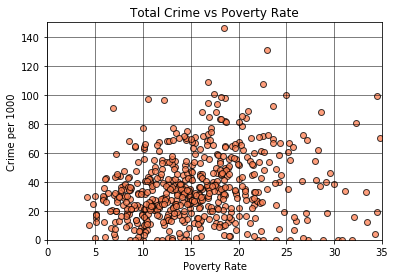

In [45]:
#fbi_census_df


x_axis = fbi_census_df["Poverty Rate"]
y_axis = fbi_census_df["Total Crime"]/fbi_census_df['Population']*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Crime vs Poverty Rate")
plt.xlabel("Poverty Rate")
plt.ylabel("Crime per 1000")
plt.ylim(-.1,150)
plt.xlim(0,35)
# plt.rcParams["figure.figsize"] = (20,20)

plt.grid(color="black",linestyle="-",linewidth=0.5)

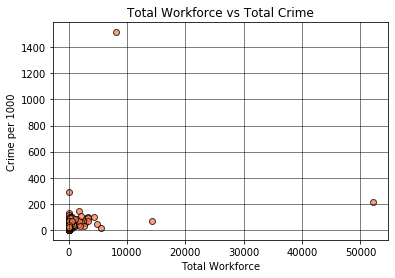

In [5]:
#fbi_census_df

x_axis = fbi_census_df["Total Workforce"]
y_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Total Crime")
plt.xlabel("Total Workforce")
plt.ylabel("Crime per 1000")
# plt.xlim(0,10000)


plt.grid(color="black",linestyle="-",linewidth=0.5)


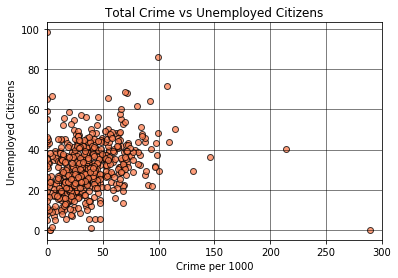

In [42]:
#fbi_census_df

x_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
y_axis = fbi_census_df["Unemployed Citizens"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Crime vs Unemployed Citizens")
plt.xlabel("Crime per 1000")
plt.ylabel("Unemployed Citizens")
plt.xlim(0,300)


plt.grid(color="black",linestyle="-",linewidth=0.5)

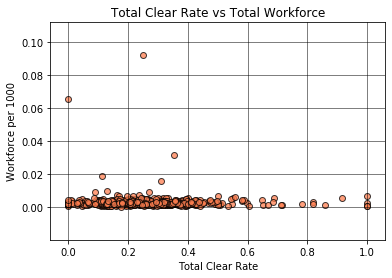

In [8]:
#fbi_census_df

x_axis = fbi_census_df["Total Clear Rate"]
y_axis = fbi_census_df["Total Workforce"]/fbi_census_df["Population"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Clear Rate vs Total Workforce")
plt.xlabel("Total Clear Rate")
plt.ylabel("Workforce per 1000")
# plt.xlim(-.1,1.1)
# plt.ylim(-.1,10000)


plt.grid(color="black",linestyle="-",linewidth=0.5)

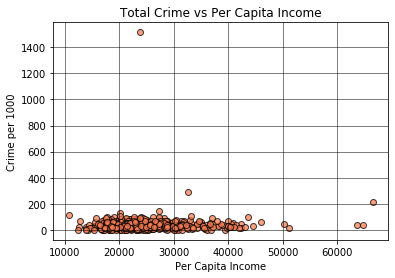

In [10]:
#fbi_census_df

x_axis = fbi_census_df["Per Capita Income"]
y_axis = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Crime vs Per Capita Income")
plt.ylabel("Crime per 1000")
plt.xlabel("Per Capita Income")


plt.grid(color="black",linestyle="-",linewidth=0.5)

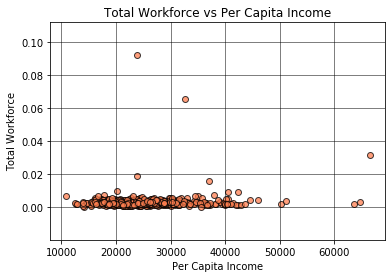

In [11]:
#fbi_census_df

x_axis = fbi_census_df["Per Capita Income"]
y_axis = fbi_census_df["Total Workforce"]/fbi_census_df["Population"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Per Capita Income")
plt.ylabel("Total Workforce")
plt.xlabel("Per Capita Income")


plt.grid(color="black",linestyle="-",linewidth=0.5)

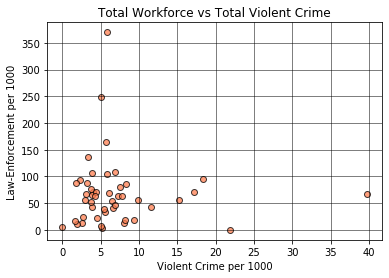

In [65]:
#fbi_census_df

x_axis = group["Total Violent Crime"]/group["Population"]*1000
y_axis = group["Law-Enforcement per 1000"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Total Violent Crime")
plt.ylabel("Law-Enforcement per 1000")
plt.xlabel("Violent Crime per 1000")


plt.grid(color="black",linestyle="-",linewidth=0.5)

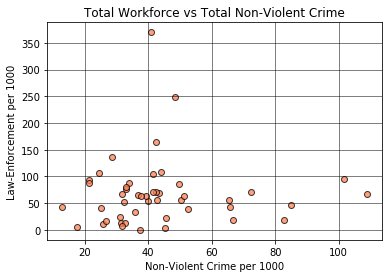

In [63]:
#fbi_census_df

x_axis = group["Total Non-Violent Crime"]/group["Population"]*1000
y_axis = group["Law-Enforcement per 1000"]
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Total Workforce vs Total Non-Violent Crime")
plt.ylabel("Law-Enforcement per 1000")
plt.xlabel("Non-Violent Crime per 1000")


plt.grid(color="black",linestyle="-",linewidth=0.5)

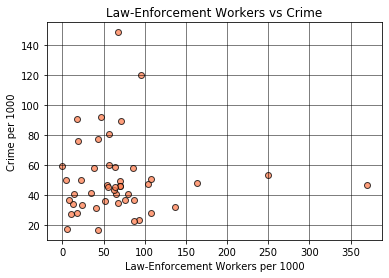

In [59]:
#fbi_census_df

x_axis = group["Law-Enforcement per 1000"]
y_axis = group["Total Crime"]/group["Population"]*1000
#size = fbi_census_df["Population"]


# Build the scatter plots for each city types

plt.scatter(x_axis,y_axis,facecolors="coral",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("Law-Enforcement Workers vs Crime")
plt.xlabel("Law-Enforcement Workers per 1000")
plt.ylabel("Crime per 1000")
# plt.xlim(0,25)
# plt.ylim(0,150)

plt.grid(color="black",linestyle="-",linewidth=0.5)

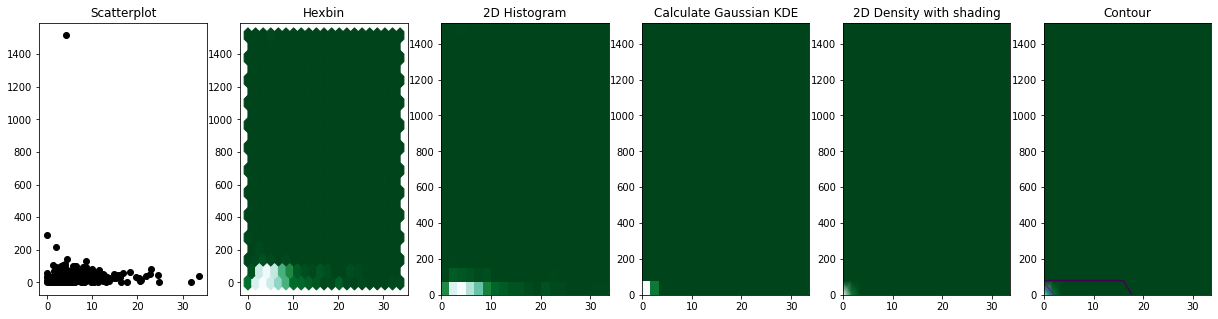

In [36]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x = fbi_census_df["Law-Enforcement per 1000"]
y = fbi_census_df["Total Crime"]/fbi_census_df["Population"]*1000
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


In [39]:
data

array([[ 2.07269412e+00,  7.04778120e-01],
       [-9.17073588e-01, -1.89187236e+00],
       [-1.35650509e+00, -7.81197681e-01],
       [ 1.53099254e+00, -1.07494741e+00],
       [-6.63136787e-01, -3.87184839e-01],
       [ 9.20613782e-01, -2.66735180e+00],
       [-6.07989881e-02, -2.25383179e+00],
       [ 3.48170947e-01, -1.34929118e+00],
       [-6.53307756e-01, -1.96862993e+00],
       [ 9.51992173e-02,  2.54510854e-01],
       [-1.74497111e-02,  3.60959208e-01],
       [ 2.34317805e-01, -5.36206613e-01],
       [-1.90370826e-01, -1.97489799e+00],
       [-8.95337872e-01, -4.73296100e-01],
       [-4.97866555e-01, -1.25805752e+00],
       [ 4.55858583e-02,  2.91397923e-01],
       [-8.17215635e-01, -6.65672004e-01],
       [ 1.10531119e+00, -2.50761741e+00],
       [-1.06893572e+00, -3.05795321e+00],
       [ 4.51930304e-01, -5.00278941e-01],
       [-2.44613530e-01, -1.40760002e+00],
       [ 4.12327387e-01,  1.09289181e-01],
       [-1.51319063e+00, -2.06049392e-01],
       [ 3.